In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Random Forest**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

# AD/CN class

In [ ]:
df_tot = pd.read_csv('/content/drive/My Drive/Speech project-Alzheimer/features_segmented55_2.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['ad/cn']]

import time
start_time = time.time()

import warnings
warnings.filterwarnings("ignore")

cv = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

clf2 = RandomForestClassifier(random_state = 0)
clf2 = GridSearchCV(clf2 , param_grid={'max_features' : [19,20], 'n_estimators':[500,700]},cv=cv) # ,random_state=0)
clf2.fit(X,y.values.ravel())

print(f"Total training time: {time.time() - start_time:.2f} seconds")
print('GridSearchCV Results : ')
print('Best Accuracy occured whith: ',clf2.best_params_)

Total training time: 206.76 seconds
GridSearchCV Results : 
Best Accuracy occured whith:  {'max_features': 20, 'n_estimators': 700}



 
 Cross_Validation Results : 
0.807 accuracy with a standard deviation of 0.002
0.882 AUC with a standard deviation of 0.006
0.808 Recall with a standard deviation of 0.012
0.794 Precision with a standard deviation of 0.010


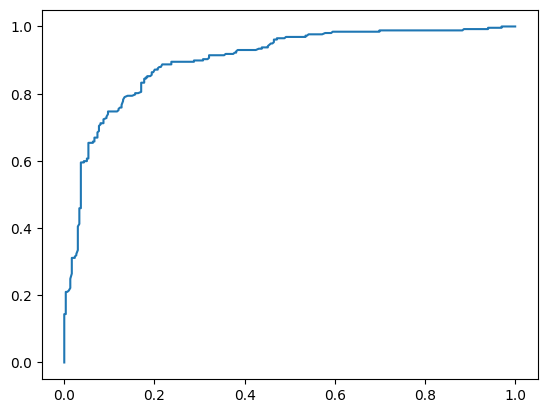

In [ ]:

clf = RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

test_probs = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])

plt.plot(fpr,tpr)

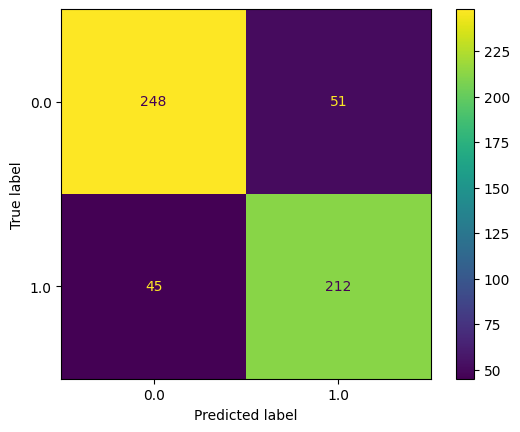

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, clf.predict(X_test_scaled))  # Calculate the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)  # Create the display object

# Plot the confusion matrix with the default color map
disp.plot(cmap='viridis')  # You can also use 'Blues' or another color map
plt.show()  # Show the plot


## Stages main model

In [ ]:
df_tot = pd.read_csv('/content/drive/My Drive/Speech project-Alzheimer/features_segmented55_2.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['Stage class']]

import warnings
warnings.filterwarnings("ignore")

cv = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

clf2 = RandomForestClassifier(random_state = 0)
clf2 = GridSearchCV(clf2 , param_grid={'max_features' : [19,20], 'n_estimators':[700,1000]},cv=cv) # ,random_state=0)
clf2.fit(X,y.values.ravel())
print('GridSearchCV Results : ')
print('Best Accuracy occured whith: ',clf2.best_params_)


GridSearchCV Results : 
Best Accuracy occured whith:  {'max_features': 20, 'n_estimators': 1000}


In [ ]:
clf = RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)

scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))



 
 Cross_Validation Results : 
0.707 accuracy with a standard deviation of 0.004
nan AUC with a standard deviation of nan
nan Recall with a standard deviation of nan
nan Precision with a standard deviation of nan


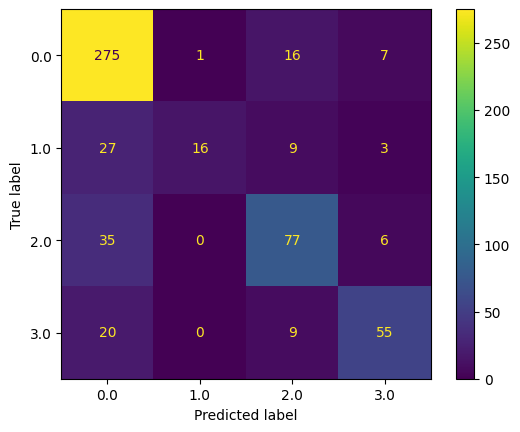

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, clf.predict(X_test_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Logistic Regression model

GridSearchCV Results : 
Best Accuracy occured whith:  {'penalty': 'l2', 'solver': 'liblinear'}

 
 Cross_Validation Results : 
0.669 accuracy with a standard deviation of 0.014
0.725 AUC with a standard deviation of 0.013
0.567 Recall with a standard deviation of 0.009
0.688 Precision with a standard deviation of 0.025


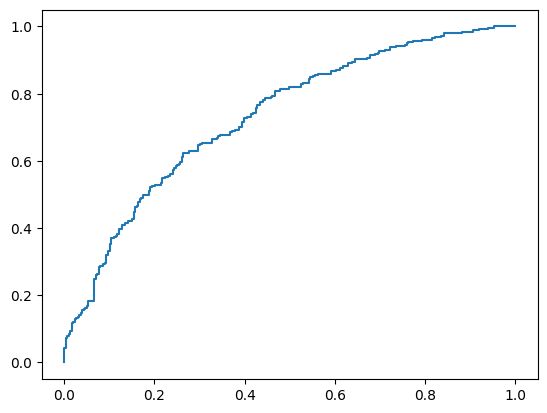

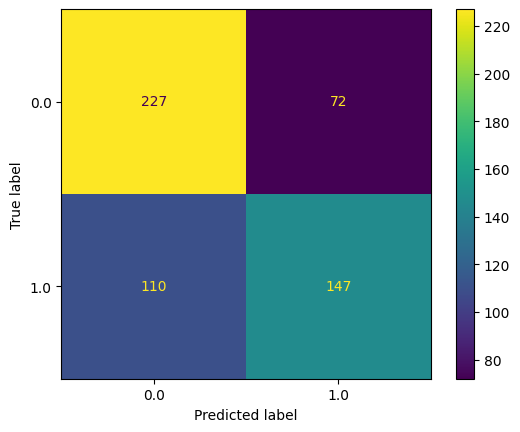

In [ ]:
from sklearn.linear_model import LogisticRegression

df_tot = pd.read_csv('/content/drive/My Drive/Speech project-Alzheimer/features_segmented55_2.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['ad/cn']]

import warnings
warnings.filterwarnings("ignore")

cv = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

clf2 = LogisticRegression(random_state =0)
clf2 = GridSearchCV(clf2 , param_grid={'penalty':['l1', 'l2'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sa', 'saga'] },cv=3) # ,random_state=0) #
clf2.fit(X,y.values.ravel())
print('GridSearchCV Results : ')
print('Best Accuracy occured whith: ',clf2.best_params_)


clf = LogisticRegression(solver='liblinear', penalty='l2' , random_state = 0)#RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

test_probs = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])

plt.plot(fpr,tpr)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instead of using plot_confusion_matrix, use ConfusionMatrixDisplay
cm = confusion_matrix(y_test, clf.predict(X_test_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Stages - logistic


In [ ]:
from sklearn.linear_model import LogisticRegression

df_tot = pd.read_csv('/content/drive/My Drive/Speech project-Alzheimer/features_segmented55_2.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['Stage class']]

import warnings
warnings.filterwarnings("ignore")

cv = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

clf2 = LogisticRegression(random_state =0)
clf2 = GridSearchCV(clf2 , param_grid={'penalty':['l1', 'l2'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sa', 'saga'] },cv=3) # ,random_state=0) #
clf2.fit(X,y.values.ravel())
print('GridSearchCV Results : ')
print('Best Accuracy occured whith: ',clf2.best_params_)

clf = LogisticRegression(solver='liblinear', penalty='l2' , random_state = 0)#RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))



GridSearchCV Results : 
Best Accuracy occured whith:  {'penalty': 'l1', 'solver': 'liblinear'}

 
 Cross_Validation Results : 
0.568 accuracy with a standard deviation of 0.010
nan AUC with a standard deviation of nan
nan Recall with a standard deviation of nan
nan Precision with a standard deviation of nan


# SVM model


 
 Cross_Validation Results : 
0.765 accuracy with a standard deviation of 0.011
0.848 AUC with a standard deviation of 0.010
0.746 Recall with a standard deviation of 0.013
0.760 Precision with a standard deviation of 0.021


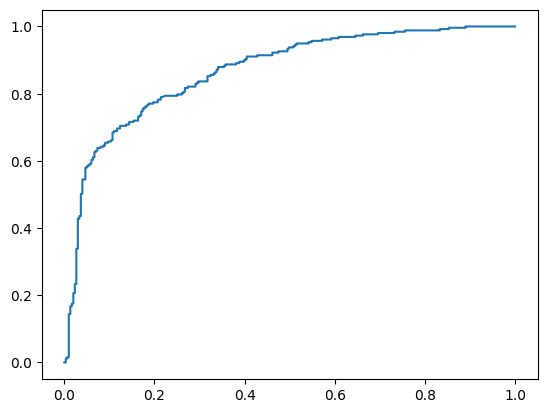

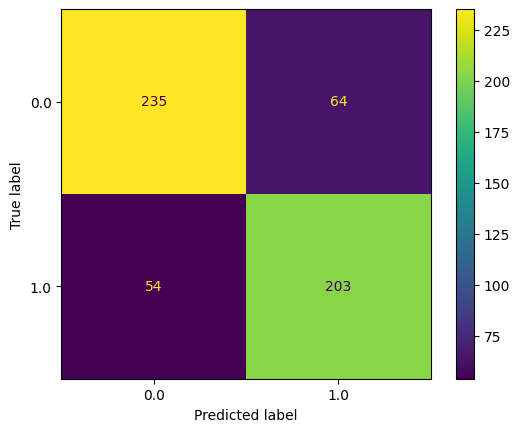

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn import svm


df_tot = pd.read_csv('/content/drive/My Drive/Speech project-Alzheimer/features_segmented55_2.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['ad/cn']]

import warnings
warnings.filterwarnings("ignore")

cv = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

clf = svm.SVC(probability=True)#LogisticRegression(solver='liblinear', penalty='l2' , random_state = 0)#RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')


print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))
print("%0.3f AUC with a standard deviation of %0.3f" % (scores_auc.mean(), scores_auc.std()))
print("%0.3f Recall with a standard deviation of %0.3f" % (scores_rec.mean(), scores_rec.std()))
print("%0.3f Precision with a standard deviation of %0.3f" % (scores_pre.mean(), scores_pre.std()))

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

test_probs = clf.predict_proba(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, test_probs[:, 1])

plt.plot(fpr,tpr)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Instead of using plot_confusion_matrix, use ConfusionMatrixDisplay
cm = confusion_matrix(y_test, clf.predict(X_test_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Stages - svm



 
 Cross_Validation Results : 
0.635 accuracy with a standard deviation of 0.008


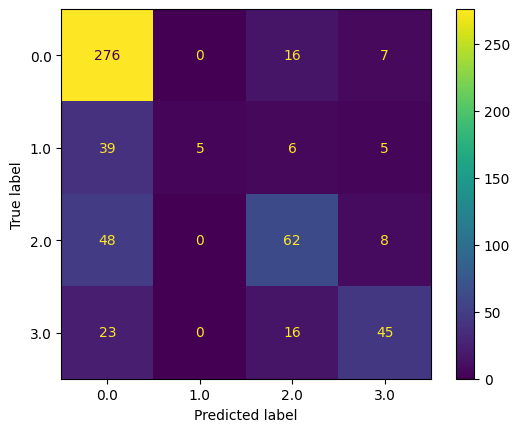

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn import svm


df_tot = pd.read_csv('/content/drive/My Drive/Speech project-Alzheimer/features_segmented55_2.csv')
df_tot = df_tot.set_index(['ID'])
df_tot = df_tot.dropna()
X = df_tot[['MFCC2', 'kurt_MFCC30', 'mean_MFCC30', 'skew_MFCC2', 'mean_MFCC16',
       'flt_bnk_eng22', 'MFCC30', 'kurt_MFCC16', 'flt_bnk_eng2','flt_bnk_eng24', 'MFCC1', 'flt_bnk_eng15', 'kurt_MFCC2',
       'flt_bnk_eng20', 'flt_bnk_eng13', 'n_sil_segments', 'frac_silence','min_sil_len', 'jitter', 'shimmer', 'HNR']] #, 'auto_correlation']]
y = df_tot[['Stage class']]

import warnings
warnings.filterwarnings("ignore")

cv = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 , train_size=0.8)

X = X_train
y = y_train

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

clf = svm.SVC(probability=True)#LogisticRegression(solver='liblinear', penalty='l2' , random_state = 0)#RandomForestClassifier(max_features = 20, random_state = 0 , n_estimators=800 )
model = clf.fit(X_scaled, y.values.ravel())#y)


scores_acc = cross_val_score(clf, X_scaled, y.values.ravel(), cv=cv)
scores_auc = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'roc_auc')
scores_rec = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'recall')
scores_pre = cross_val_score(clf, X_scaled, y, cv=cv, scoring = 'precision')

print('\n \n Cross_Validation Results : ')
print("%0.3f accuracy with a standard deviation of %0.3f" % (scores_acc.mean(), scores_acc.std()))

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Instead of:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(clf ,X_test_scaled, y_test)

# Use:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, clf.predict(X_test_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()